In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, selu, gelu
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Reshape, Flatten
from tensorflow.keras.layers import LSTM, GRU, RNN
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [2]:

!pip install -U datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.2 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset 
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:

### This is a dictionary as
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:

### We will use training set for the whole stuff
### We will use validation set for fine tuning,
### We will use test set to see if we are doing good!!!!
### Let's get started
### Here is an example of such a tweet
### Each time you run this cell you will get different tweet and a label.
### Please run this cell a couple of times to see some tweets
import numpy as np
index = np.random.randint(0, 1000)
tweet = emotions["train"]["text"][index]
label = emotions["train"]["label"][index]
label_dict = {0:"Saddness", 1: "Joy", 3:"Anger", 4:"Fear", 5:"Surprise", 2:"Love"}
print(f"Tweet: {tweet} \nLabel: {label_dict[label]}")

Tweet: i feel like ive been in a more innocent version of a one night stand 
Label: Joy


### The following cell is a graded cell!!!

 Here let's get some information about the tweets (This is your job BTW)

 1) Get the lengths and their distribution of the tweets
 
 2) Find the length of the longest tweet (remember to use .split() function to tokenize your tweets to find their lengths)

2.5) Get the vocab_size

3) Check if the labels are uniformly distributed (or see if the data is balanced!!!)

 Your code here!!!!

In [6]:

#  tokenizing your tweets to find their lengths
list_word=[]
for i in emotions["train"]["text"]:
  list_word.append(i.split(' '))

# Find lenght of list: 
len_list=[]
for i in list_word:
  len_list.append(len(i))

dict_word = dict(zip(emotions["train"]["text"], len_list))


In [7]:
# Find the length of the longest tweet
inverse = [(value, key) for key, value in dict_word.items()]
max_length=max(inverse)
print(max_length)

(66, 'i guess which meant or so i assume no photos no words or no other way to convey what it really feels unless you feels it yourself or khi bi t au th m i bi t th ng ng i b au i rephrase it to a bit more gloomy context unless you are hurt yourself you will never have sympathy for the hurt ones')


In [ ]:
#train_text=[str(x) for x in emotions["train"]["text"]]

In [8]:
from collections import Counter
def count_func(train_text):
  count=Counter()
  for sentence in train_text:
    for word in sentence.split():
      count[word] +=1
  return count



In [9]:
counter=count_func(emotions["train"]["text"])
counter

Counter({'i': 25859,
         'didnt': 272,
         'feel': 11183,
         'humiliated': 50,
         'can': 966,
         'go': 393,
         'from': 689,
         'feeling': 5112,
         'so': 2527,
         'hopeless': 65,
         'to': 8972,
         'damned': 4,
         'hopeful': 59,
         'just': 1391,
         'being': 681,
         'around': 315,
         'someone': 251,
         'who': 567,
         'cares': 16,
         'and': 9589,
         'is': 2184,
         'awake': 21,
         'im': 2430,
         'grabbing': 5,
         'a': 6200,
         'minute': 24,
         'post': 113,
         'greedy': 65,
         'wrong': 71,
         'am': 2082,
         'ever': 221,
         'nostalgic': 51,
         'about': 1795,
         'the': 8370,
         'fireplace': 3,
         'will': 697,
         'know': 853,
         'that': 5112,
         'it': 3127,
         'still': 595,
         'on': 1551,
         'property': 4,
         'grouchy': 27,
         'ive': 587,
    

In [10]:
# NUMBER OF UNIQUE WORDS
num_unique_words=len(counter)
num_unique_words

15212

In [11]:
counter.most_common(20)

[('i', 25859),
 ('feel', 11183),
 ('and', 9589),
 ('to', 8972),
 ('the', 8370),
 ('a', 6200),
 ('feeling', 5112),
 ('that', 5112),
 ('of', 4990),
 ('my', 4283),
 ('in', 3433),
 ('it', 3127),
 ('like', 2908),
 ('so', 2527),
 ('for', 2431),
 ('im', 2430),
 ('me', 2309),
 ('but', 2255),
 ('was', 2227),
 ('have', 2224)]

In [12]:
train_label=[str(x) for x in emotions["train"]["label"]]
counter_label=count_func(train_label)
counter_label


Counter({'0': 4666, '3': 2159, '2': 1304, '5': 572, '4': 1937, '1': 5362})

In [13]:
# List of emotions that dataset's text include
counter_label['Sadness']=counter_label['0']
del counter_label['0'] 

In [14]:
counter_label['Fear']=counter_label['4']
del counter_label['4']

In [15]:
counter_label['Suprise']=counter_label['5']
del counter_label['5']

In [16]:
counter_label['Love']=counter_label['2']
del counter_label['2']

In [17]:
counter_label['Joy']=counter_label['1']
del counter_label['1']

In [18]:
counter_label['Anger']=counter_label['3']
del counter_label['3']

In [19]:
counter_label

Counter({'Sadness': 4666,
         'Fear': 1937,
         'Suprise': 572,
         'Love': 1304,
         'Joy': 5362,
         'Anger': 2159})

NOTE= AS WE CAN SEE FROM THE ABOVE RESULT, MOST FREQUENCY DATA IS JOY AND THERE ARE IMBALANCE BETWEEN DISTRIBUTIONS OF EMOTIONS IN DATASET

In [20]:

### We will use some utilities of Tensorflow instead of hardcoding everything as we did in the lecture,
### Remember that we are doing tweet classification
### We won't be using any manual text-to-number functionalities insted we shall use 
# tf.keras.layers.TextVectorization layer

In [21]:
from tensorflow.keras.layers import TextVectorization, LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential

In [22]:
X_train, y_train = emotions["train"]["text"], emotions["train"]["label"]
X_val, y_val = emotions["validation"]["text"], emotions["validation"]["label"]
X_test, y_test = emotions["test"]["text"], emotions["test"]["label"]

In [23]:
text_to_num = TextVectorization(max_tokens=num_unique_words) ### see properties of this layer as they are pretty important
text_to_num.adapt(X_train)  ### this dude automatically fits preprocessing layer
     

In [24]:
## you can use this layer to feed directly text to your model as
text_to_num(X_train[:10])

<tf.Tensor: shape=(10, 23), dtype=int64, numpy=
array([[    2,   140,     3,   686,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    2,    40,   102,    60,     9,    15,   500,     5,    15,
         4011,   561,    32,    60,    61,   128,   148,    76,  1529,
            4,    22,  1289,     0,     0],
       [   17,  3316,     7,  1160,     5,   289,     2,     3,   501,
          438,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    2,    24,   165,     9,   672,    27,     6,  4900,     2,
           59,    47,     8,    13,    22,    72,    30,     6,  3709,
            0,     0,     0,     0,     0],
       [    2,    24,     9,  1087,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [   73,    48, 

In [25]:
#### your code here -- get the vocab size from text_to_num object.
#dir(text_to_num)
vocab = text_to_num.get_vocabulary()
vocab_size = len(vocab)
print(vocab[:10])
print(f"Length of vocabulary: {vocab_size}")

['', '[UNK]', 'i', 'feel', 'and', 'to', 'the', 'a', 'that', 'feeling']
Length of vocabulary: 15212


### MODEL-1 WITH LSTM

In [32]:
  model = Sequential()
  model.add( tf.keras.layers.Input(dtype=tf.string, shape=(1,)))
  model.add(text_to_num)
  model.add(tf.keras.layers.Embedding(input_dim=len(text_to_num.get_vocabulary()) , output_dim=256))
  model.add(tf.keras.layers.LSTM(256, dropout=0.2,return_sequences=True))
  
  model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
  model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history=model.fit(X_train,y_train, batch_size=64, epochs=20, validation_data=(X_val,y_val))


Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
model_test_acc=list()

In [ ]:
model_test_loss =list()

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
## Use sequential model and add first text_to_num layer, then embedding layer and then LSTM or GRU, then use dense layer. 
# If you do not make really bad choices in your hyperparameters, you will see at least 85% validation accuracy.
adam = Adam(learning_rate=0.005)
for i in range(64,320,64):
 
  model = Sequential()

  model.add( tf.keras.layers.Input(dtype=tf.string, shape=(1,)))
  model.add(text_to_num)
  model.add(tf.keras.layers.Embedding(input_dim=len(text_to_num.get_vocabulary()) , output_dim=2*i))
  model.add(Bidirectional(LSTM(2*i, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
  model.add(Bidirectional(LSTM(i, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
  model.add(Bidirectional(LSTM(i, dropout=0.2,recurrent_dropout=0.2)))
  model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
  model.compile(loss= 'sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  history=model.fit(X_train,y_train, batch_size=256, epochs=20, validation_data=(X_val,y_val))
  model1_test_loss, model1_test_acc = model.evaluate(X_test,y_test)
  model_test_loss.append(model1_test_loss)
  model_test_acc.append(model1_test_acc)



Epoch 1/20
 69/250 [=======>......................] - ETA: 4:22 - loss: 1.4731 - accuracy: 0.4221

KeyboardInterrupt: ignored

In [ ]:
model_layer_size=[160,192,224,256,288]

In [ ]:
model_dict_acc= dict(zip(model_layer_size,model_test_acc))

print('Model test Accuracy of each layer size:',model_dict_acc)

Model test Accuracy of each layer size: {64: 0.8880000114440918, 128: 0.5055000185966492, 192: 0.9100000262260437, 256: 0.909500002861023}


In [ ]:
model_dict_loss= dict(zip(model_layer_size,model_test_loss))
print('Model test Loss of each layer size:',model_dict_loss)

Model test Loss of each layer size: {64: 0.509524941444397, 128: 0.9910035133361816, 192: 0.34785887598991394, 256: 0.3851499855518341}


NOTE= Best LSTM acc score(0.9100) come from the submodel  whose layer size is 192

### PREDICTION

In [ ]:

prediction=model.predict(["Why so serious???"]) ### This will give you class probabilities,
### use argmax function to get class with the highest probability then use dictionary 
label_dict = {0:"Saddness", 1: "Joy", 3:"Anger", 4:"Fear", 5:"Surprise", 2:"Love"}
key=np.argmax(prediction)
for i,j in label_dict.items():
  if key==i:
    print(j)




1/1 [==============================] - 0s 461ms/step
Saddness


In [ ]:
# PREDICTION FUNCTION
def label_predict(tweet:str):
  label_dict = {0:"Saddness", 1: "Joy", 3:"Anger", 4:"Fear", 5:"Surprise", 2:"Love"}
  predictions = model.predict([tweet])
  key=np.argmax(predictions)
  for i,j in label_dict.items():
    if key ==i:
      return j


In [ ]:
# TEST PREDICTION FUNCTION WITH A STRING
label_predict("Why so serious???")

1/1 [==============================] - 0s 32ms/step


'Saddness'

### TEST ACCURACY

In [ ]:

test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
### Compute your final accuracy on test set.
## Your code here!!!!

63/63 [==============================] - 0s 6ms/step - loss: 0.3851 - accuracy: 0.9095
Test Loss: 0.3851499855518341
Test Accuracy: 0.909500002861023


### ACC AND LOSS GRAPH OF ALL LAYER SIZE THAT I TRIED IN ABOVE MODEL

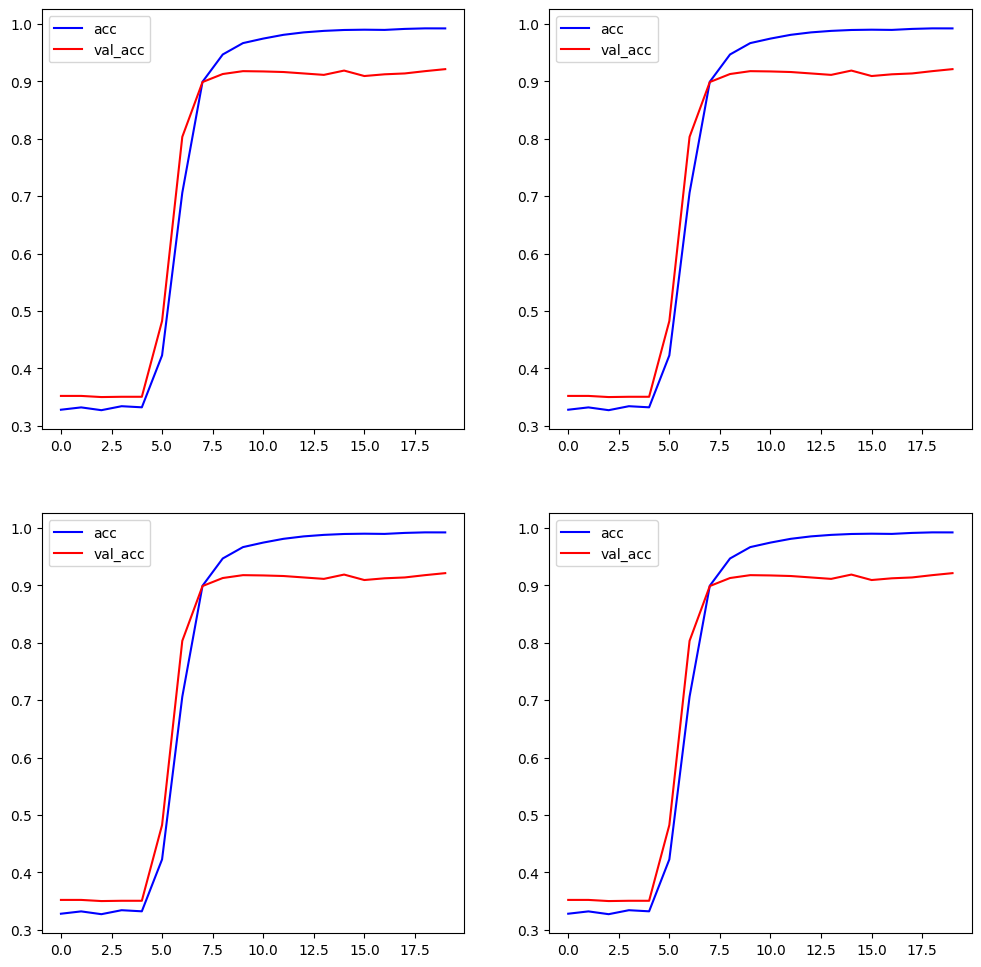

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(3, 2, figsize=(12,12),dpi=100)
for i in range(len(model_layer_size)):
  x=i//2
  y= i %2
  sns.lineplot(history.history['accuracy'], label = "acc",c='blue', ax=ax[x,y])
  sns.lineplot(history.history['val_accuracy'], label = "val_acc",c='red',ax=ax[x,y])
  ax[x,y].xaxis.label.set_size(15)
  ax[x,y].yaxis.label.set_size(15)
plt.legend()
plt.show()

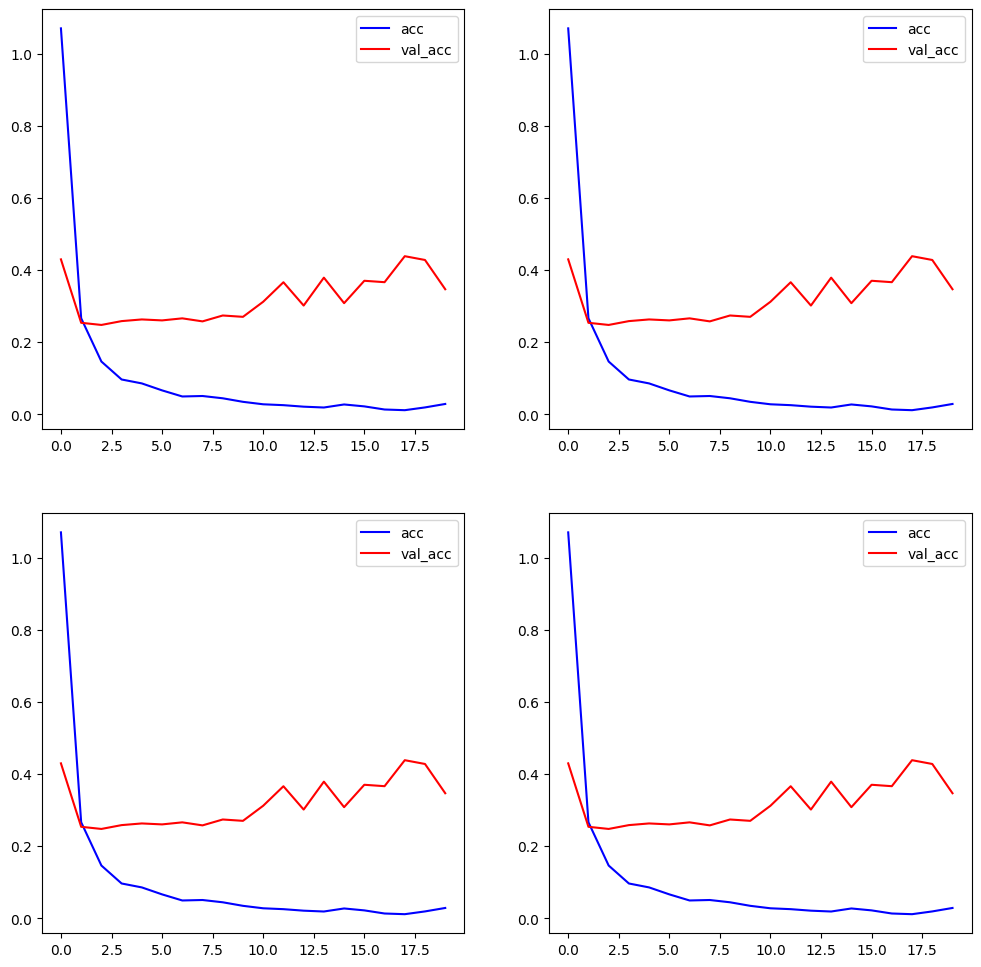

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(12,12),dpi=100)
for i in range(len(model_layer_size)):
  x=i//2
  y= i %2
  sns.lineplot(history.history['loss'], label = "loss",c='blue', ax=ax[x,y])
  sns.lineplot(history.history['val_loss'], label = "val_loss",c='red',ax=ax[x,y])
  ax[x,y].xaxis.label.set_size(15)
  ax[x,y].yaxis.label.set_size(15)
plt.legend()
plt.show()

#### CONFUSION MATRIX

### MODEL-2 WITH BIDIRECTIONAL LSTM

In [ ]:
bimodel_test_acc=list()

In [ ]:
bimodel_test_loss=list()

In [ ]:

for i in range(32,160,32): 
  bimodel_layer_size.append(i)
  model = tf.keras.Sequential()
  model.add(text_to_num)
  model.add(Embedding(len(text_to_num.get_vocabulary()), 2*i ))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2*i,  return_sequences=True)))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(i)))
  model.add(Dense(2*i, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation = 'softmax'))
  model.compile(loss= 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'] )
  history=model.fit(X_train,y_train, batch_size=64, epochs=20, validation_data=(X_val,y_val))
  bimodel1_test_loss, bimodel1_test_acc = model.evaluate(X_test,y_test)
  bimodel_test_loss.append(bimodel1_test_loss)
  bimodel_test_acc.append(bimodel1_test_acc)


Epoch 1/20
250/250 [==============================] - 35s 109ms/step - loss: 1.4398 - accuracy: 0.3867 - val_loss: 1.0746 - val_accuracy: 0.5670
Epoch 2/20
250/250 [==============================] - 11s 44ms/step - loss: 0.6907 - accuracy: 0.7540 - val_loss: 0.5226 - val_accuracy: 0.8095
Epoch 3/20
250/250 [==============================] - 10s 40ms/step - loss: 0.3071 - accuracy: 0.9049 - val_loss: 0.3620 - val_accuracy: 0.8900
Epoch 4/20
250/250 [==============================] - 5s 20ms/step - loss: 0.1829 - accuracy: 0.9447 - val_loss: 0.3321 - val_accuracy: 0.9030
Epoch 5/20
250/250 [==============================] - 5s 18ms/step - loss: 0.1398 - accuracy: 0.9578 - val_loss: 0.3852 - val_accuracy: 0.9100
Epoch 6/20
250/250 [==============================] - 8s 33ms/step - loss: 0.1137 - accuracy: 0.9679 - val_loss: 0.3990 - val_accuracy: 0.9030
Epoch 7/20
250/250 [==============================] - 6s 26ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.4317 - val_accuracy: 0.

In [ ]:
bimodel_layer_size=[32,64,96,128]

In [ ]:
bimodel_dict_acc= dict(zip(bimodel_layer_size,bimodel_test_acc))

print('Model test Accuracy of each layer size:',bimodel_dict_acc)

Model test Accuracy of each layer size: {32: 0.8999999761581421, 64: 0.9129999876022339, 96: 0.9229999780654907, 128: 0.9150000214576721}


In [ ]:
bimodel_dict_loss= dict(zip(bimodel_layer_size,bimodel_test_loss))

print('Model test Loss of each layer size:',bimodel_dict_loss)

Model test Loss of each layer size: {32: 0.5086016058921814, 64: 0.47696617245674133, 96: 0.3503667712211609, 128: 0.3666224777698517}


NOTE= Best Bidirectional LSTM acc score (0.92299) come from the submodel whose layer size is 96

### ACC AND LOSS GRAPH OF ALL LAYER SIZE THAT I TRIED IN ABOVE MODEL

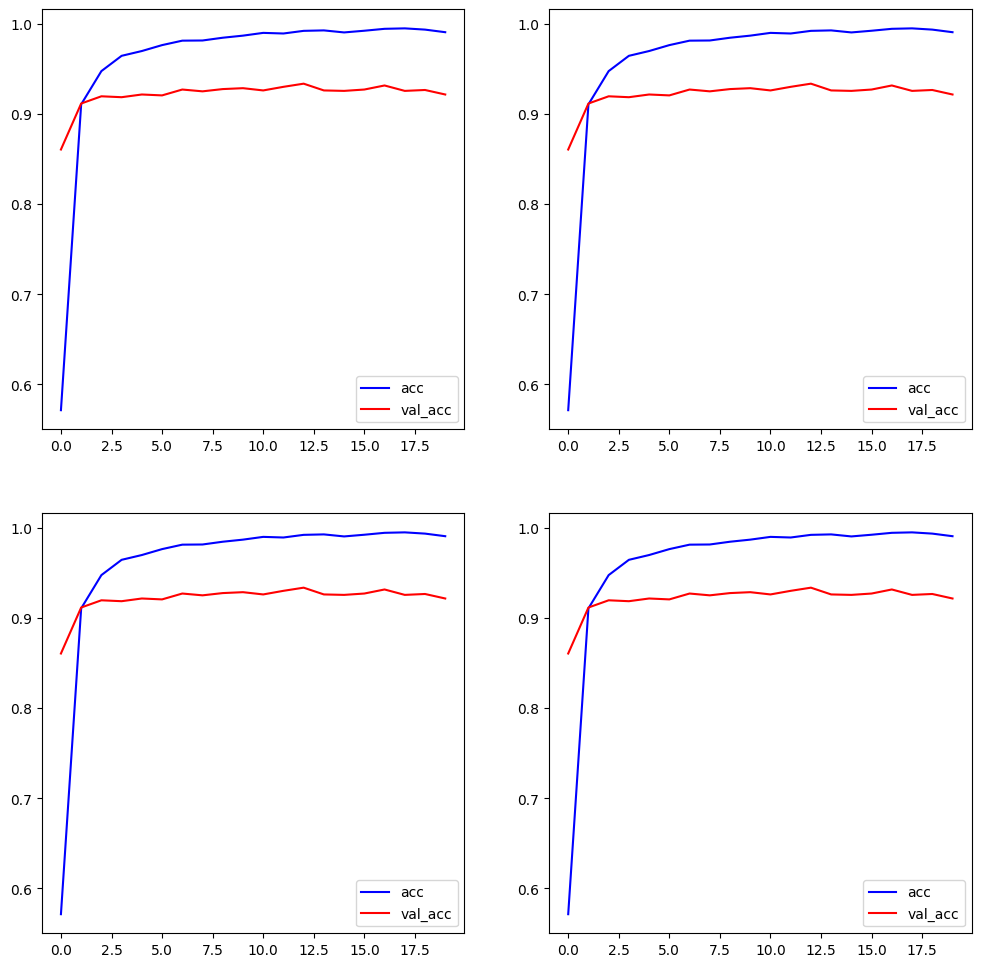

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(12,12),dpi=100)
for i in range(len(model_layer_size)):
  x=i//2
  y= i %2
  sns.lineplot(history.history['accuracy'], label = "acc",c='blue', ax=ax[x,y])
  sns.lineplot(history.history['val_accuracy'], label = "val_acc",c='red',ax=ax[x,y])
  ax[x,y].xaxis.label.set_size(15)
  ax[x,y].yaxis.label.set_size(15)
plt.legend()
plt.show()

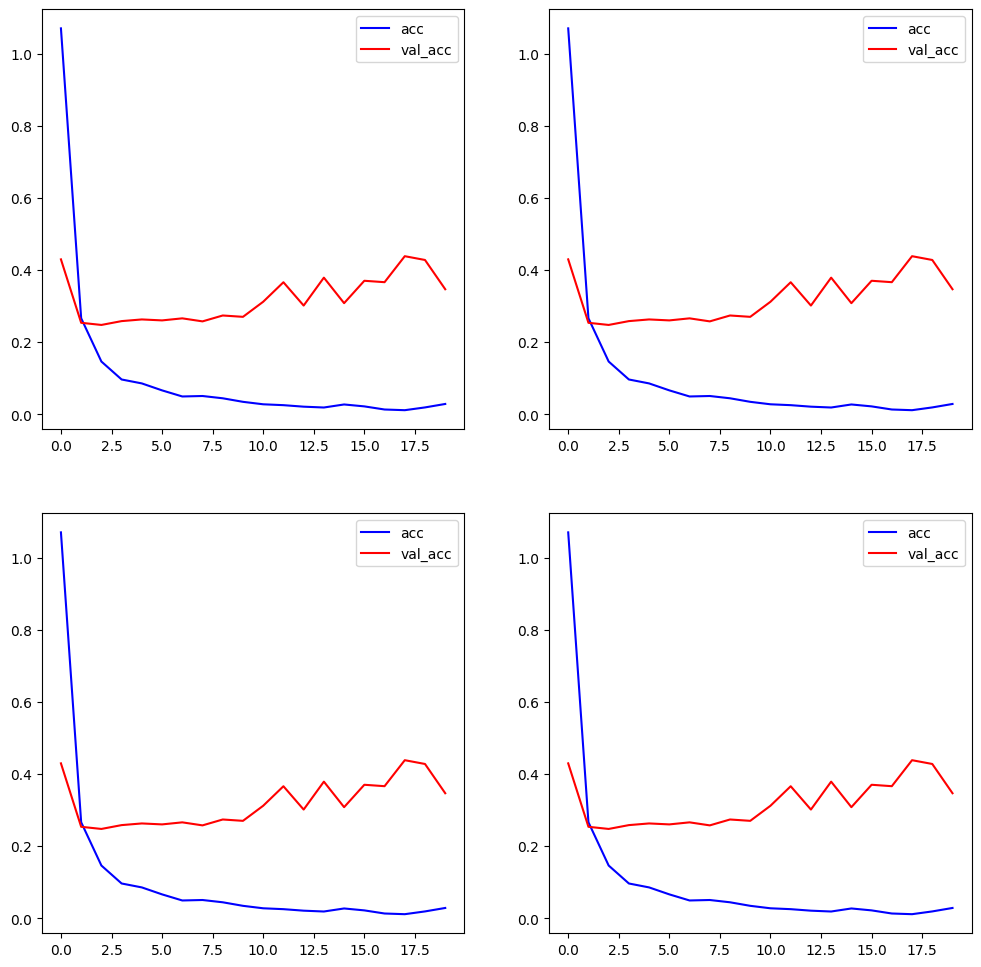

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(12,12),dpi=100)
for i in range(len(model_layer_size)):
  x=i//2
  y= i %2
  sns.lineplot(history.history['loss'], label = "loss",c='blue', ax=ax[x,y])
  sns.lineplot(history.history['val_loss'], label = "val_loss",c='red',ax=ax[x,y])
  ax[x,y].xaxis.label.set_size(15)
  ax[x,y].yaxis.label.set_size(15)
plt.legend()
plt.show()

### PREDICTION 

In [ ]:
label_predict("Why so serious???")

1/1 [==============================] - 0s 41ms/step


'Joy'

### ACCURACY

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

63/63 [==============================] - 1s 10ms/step - loss: 0.3666 - accuracy: 0.9150
Test Loss: 0.3666224777698517
Test Accuracy: 0.9150000214576721


### FINAL MODEL 
I tried different layer size of LSTM and Bidirectional LSTM above.  I will rebuild the model that gave best accuracy score from the above trials.

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

In [ ]:
  model = tf.keras.Sequential()
  model.add(text_to_num)
  model.add(Embedding(len(text_to_num.get_vocabulary()), 2*96 ))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2*96,  return_sequences=True)))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2*96)))
  model.add(Dense(2*96, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation = 'softmax'))
  model.compile(loss= 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'] )
  history=model.fit(X_train,y_train, batch_size=64, epochs=20, validation_data=(X_val,y_val),callbacks=[callback])


Epoch 1/20
250/250 [==============================] - 36s 108ms/step - loss: 1.1542 - accuracy: 0.5366 - val_loss: 0.5540 - val_accuracy: 0.8145
Epoch 2/20
250/250 [==============================] - 9s 35ms/step - loss: 0.3198 - accuracy: 0.8979 - val_loss: 0.2714 - val_accuracy: 0.9150
Epoch 3/20
250/250 [==============================] - 8s 33ms/step - loss: 0.1629 - accuracy: 0.9452 - val_loss: 0.2448 - val_accuracy: 0.9200
Epoch 4/20
250/250 [==============================] - 7s 27ms/step - loss: 0.1154 - accuracy: 0.9611 - val_loss: 0.2359 - val_accuracy: 0.9240
Epoch 5/20
250/250 [==============================] - 7s 27ms/step - loss: 0.0811 - accuracy: 0.9709 - val_loss: 0.2510 - val_accuracy: 0.9235
Epoch 6/20
250/250 [==============================] - 6s 25ms/step - loss: 0.0645 - accuracy: 0.9758 - val_loss: 0.2813 - val_accuracy: 0.9220
Epoch 7/20
250/250 [==============================] - 7s 27ms/step - loss: 0.0544 - accuracy: 0.9802 - val_loss: 0.3115 - val_accuracy: 0.92

NOTE= VAL_ACCURACY REACHED 0.9305

In [ ]:
 loss, acc = model.evaluate(X_test,y_test)


63/63 [==============================] - 1s 12ms/step - loss: 0.4246 - accuracy: 0.9045


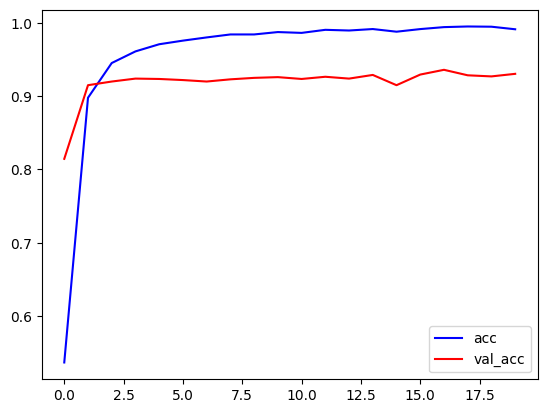

In [ ]:
import seaborn as sns
sns.lineplot(history.history['accuracy'], label = "acc",c='blue')
sns.lineplot(history.history['val_accuracy'], label = "val_acc",c='red')
plt.show()

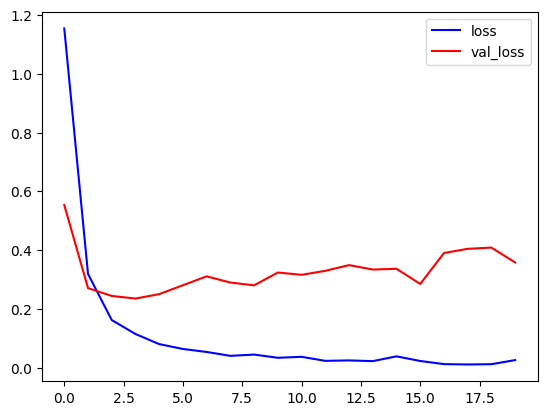

In [ ]:
sns.lineplot(history.history['loss'], label = "loss",c='blue')
sns.lineplot(history.history['val_loss'], label = "val_loss",c='red')
plt.show()

In [ ]:
# PREDICTION FUNCTION
def label_predict(tweet:str):
  label_dict = {0:"Saddness", 1: "Joy", 3:"Anger", 4:"Fear", 5:"Surprise", 2:"Love"}
  predictions = model.predict([tweet])
  key=np.argmax(predictions)
  print(label_dict[key])
 

In [ ]:
label_predict("Why so serious???")

1/1 [==============================] - 0s 44ms/step
Joy


In [ ]:
label_predict("I am very nervous about result of last exam.")

1/1 [==============================] - 0s 42ms/step
Fear


In [ ]:
label_predict("You are looking great")

1/1 [==============================] - 0s 59ms/step
Joy
